In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.interpolate import UnivariateSpline
import pandas as pd

In [2]:
data_file = "data/20170721-Ar-H-Torch.txt"

In [3]:
data = np.loadtxt(data_file, skiprows=14)

In [4]:
data.shape

(2048, 2)

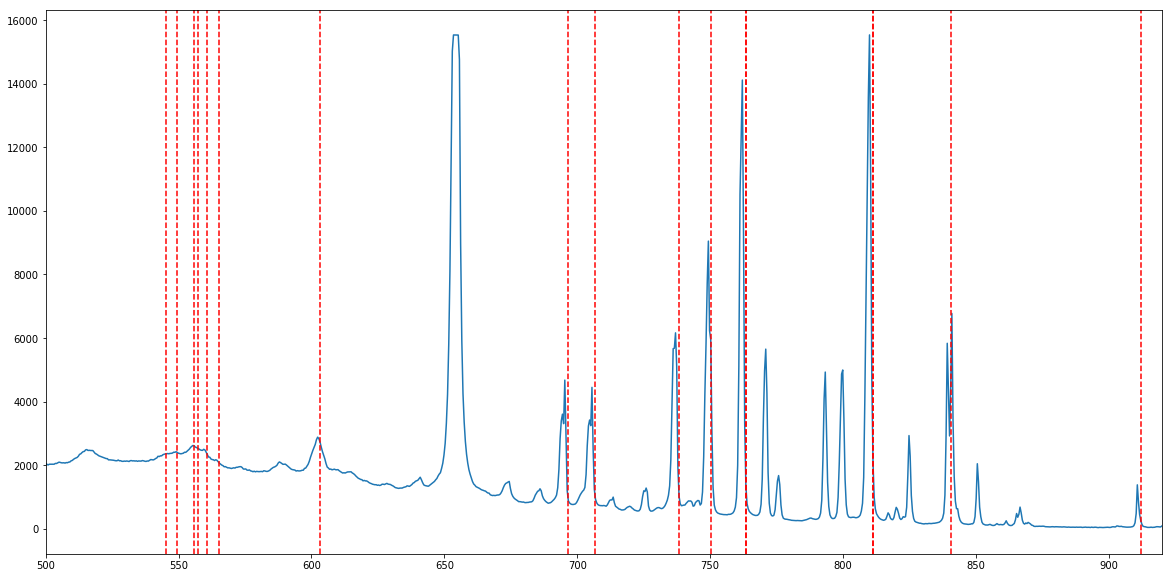

In [20]:
plt.figure(1, figsize=(20,10))

plt.plot(data[:,0], data[:,1])

ar_lines = [
    545.16,
    549.58,
    555.87,
    557.25,
    560.67,
    565.07,
    811.5311,
    763.5105,
    811.5311,
    763.5105,
    750.3869,
    738.3980,
    706.7217,
    696.5430,
    840.8209,
    603.2127,
    912.2967
]

for line in ar_lines:
    plt.axvline(x=line, linestyle='--', color='red')

plt.xlim(500, 920)    

plt.show()

In [6]:
def black_body(temperature, wavelength):
    h = const.Planck
    c = const.c
    k = const.Boltzmann
    
    l = wavelength
    
    numerator = 2 * h * c ** 2 / l ** 5
    denominator = np.exp(h * c / (l * k * temperature)) - 1
    
    return numerator / denominator

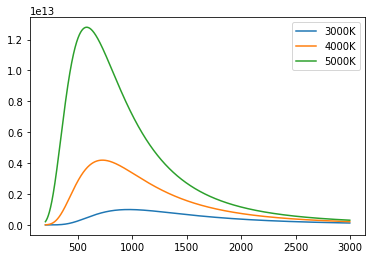

In [7]:
wavelengths = np.arange(200, 3000, 1)

for T in [3000, 4000, 5000]:
    plt.plot(wavelengths, black_body(T, wavelengths * 1e-9), label="{}K".format(T))
plt.legend(loc="upper right")
plt.show()

In [8]:
print(wavelengths)

[ 200  201  202 ..., 2997 2998 2999]


# Find the derivative of the original spectrum

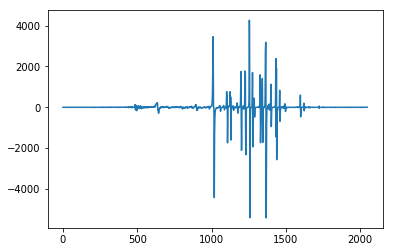

In [9]:
plt.plot(np.gradient(data[:,1]))
plt.show()

In [10]:
deriv = np.gradient(data[:,1])
print(deriv)

[ 0.     0.     0.425 ...,  1.05   1.175  8.05 ]


In [11]:
np.std(deriv)

422.59541650211185

In [12]:
a = np.argwhere(np.abs(deriv)>400)

if a.shape[0] % 2 != 0:
    a = np.delete(a, -1)

b = a.reshape(-1, 2)
b.shape
print(b)

[[1005 1006]
 [1007 1008]
 [1009 1010]
 [1011 1017]
 [1018 1019]
 [1020 1021]
 [1022 1100]
 [1101 1102]
 [1105 1107]
 [1108 1124]
 [1125 1126]
 [1128 1130]
 [1131 1195]
 [1196 1197]
 [1198 1201]
 [1202 1203]
 [1223 1224]
 [1225 1226]
 [1227 1228]
 [1229 1230]
 [1231 1232]
 [1252 1253]
 [1254 1255]
 [1256 1257]
 [1258 1259]
 [1260 1273]
 [1274 1275]
 [1276 1278]
 [1279 1280]
 [1286 1289]
 [1290 1325]
 [1326 1327]
 [1328 1329]
 [1330 1331]
 [1339 1340]
 [1341 1342]
 [1343 1344]
 [1345 1346]
 [1360 1361]
 [1362 1363]
 [1364 1365]
 [1366 1367]
 [1368 1369]
 [1370 1398]
 [1399 1401]
 [1402 1431]
 [1432 1433]
 [1434 1436]
 [1437 1438]
 [1439 1440]
 [1458 1460]
 [1461 1597]]


In [13]:
a = np.array([
    [1, 2],
    [2, 10],
    [3, 4],
    [4, 12]
])
np.argwhere(a[:,1]>5)


array([[1],
       [3]])

# Univariate Spline Fit for smoothing

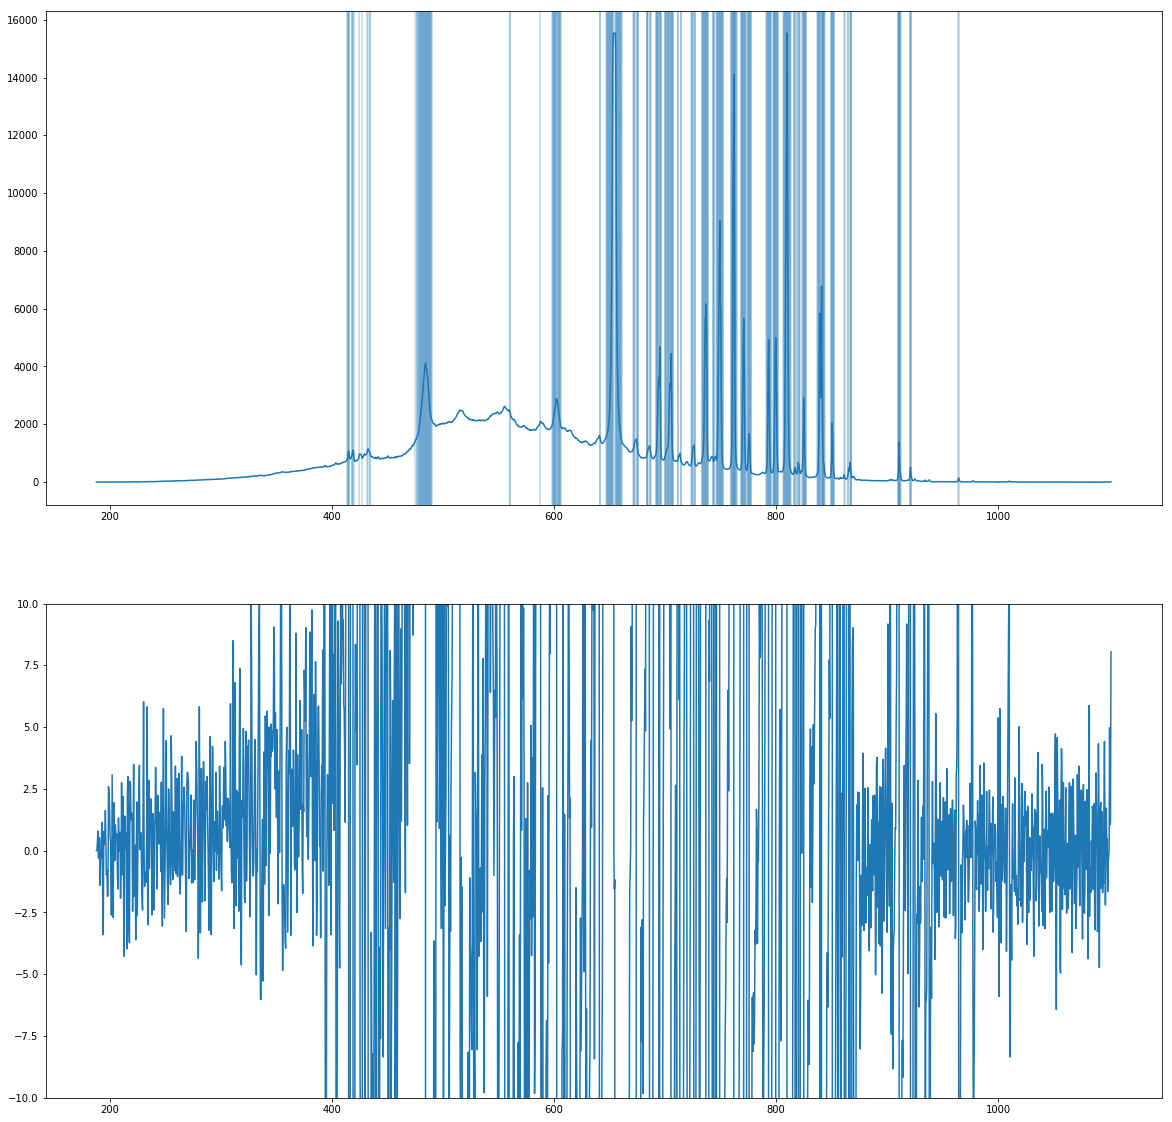

In [14]:
plt.figure(1, figsize=(20, 20))

ds = UnivariateSpline(data[:,0], data[:,1], s=1e8)(data[:,0])

plt.subplot(211)
plt.plot(data[:,0], data[:,1])
#plt.plot(data[:,0], ds)
for _ in np.argwhere(np.abs(deriv)>50):
    plt.axvline(x=data[_,0], alpha=0.3)

plt.subplot(212)
plt.plot(data[:,0], deriv)
plt.ylim(-10,10)

plt.show()

Need to detect the point where the derivative goes high (above threshold) then when it goes low after that

Find the point where derivative crosses threshold

# Loading Ar lines from NIST

https://physics.nist.gov/PhysRefData/Handbook/Tables/argontable2.htm

In [15]:
url = 'https://physics.nist.gov/PhysRefData/Handbook/Tables/argontable2.htm'

In [16]:
# From https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

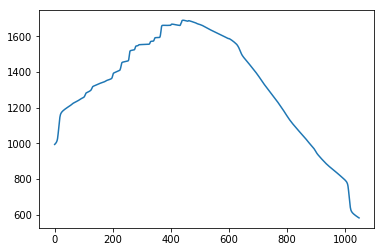

In [17]:
plt.plot(moving_average(data[:,1], n=1000))
plt.show()